## Click-Through Rate Prediction Assignment

Perform missing value and outlier treatment, if needed, in the data set you received. >> Done
Perform categorical variable treatment:
Identify the categorical columns 
Use suitable techniques to treat these categorical columns. For instance, as explained earlier, the banner position is a categorical variable. 
Perform a train-test split in the data set (the usual split followed in the industry is 70-30 or 80-20).
Identify the 3 classification methods you will use in the data set, and explain the reason you chose those 3 methods in the notebook file you will share in the submission process.
For all 3 methods, use appropriate evaluation metrics to assess model performance. Also, evaluate the models' basis the cross-validation.
Compare which methods work best based on the evaluation metrics mentioned in the previous point.
Use model simplification techniques like feature creation and selection, to improve model predictability. 
After building the best model possible, explain the risks associated with adopting the model to the business team (You can create a 3-5 slide presentation)
Interpret the evaluation metric of choice 
Explain the implications of errors made in the prediction by the model.

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Read the data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


# Info 

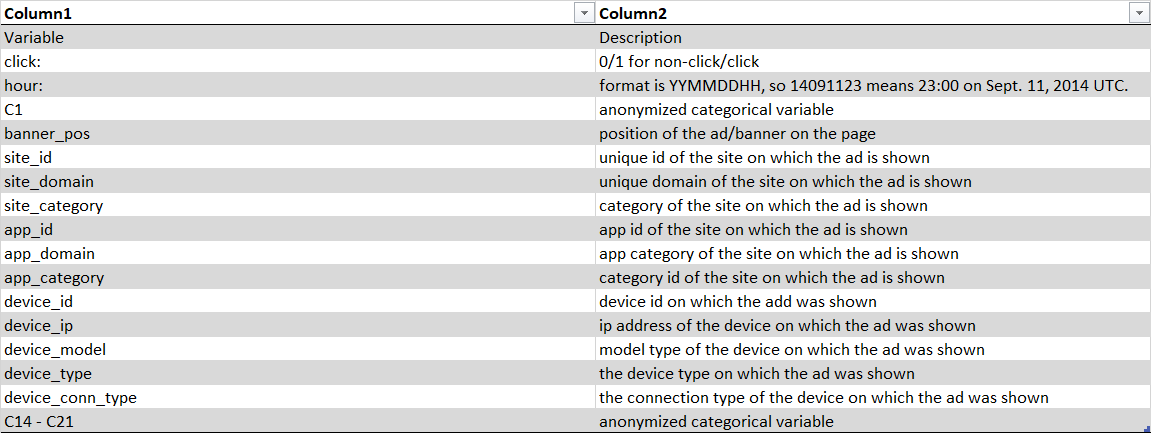

In [3]:
# info to Identify the categorical columns  , Object are categorical column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

<AxesSubplot:xlabel='click'>

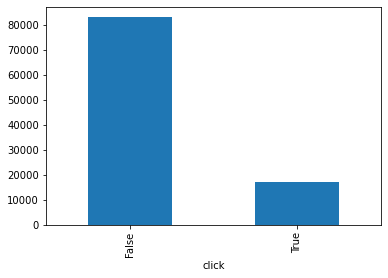

In [4]:
df.groupby('click').size().plot(kind='bar')

### 1.) Perform missing value and outlier treatment, if needed, in the data set you received.

In [5]:
# Checking Missing Value
print(df.isna().sum())

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64


In [6]:
duplicate=df[df.duplicated()]
print(duplicate)

       click    C1  banner_pos   site_id site_domain site_category    app_id  \
396    False  1005           0  85f751fd    c4e18dd6      50e219e0  d36838b1   
5750   False  1005           1  a7853007    7e091613      f028772b  ecad2386   
7491   False  1005           0  5bcf81a2    9d54950b      f028772b  ecad2386   
7888   False  1005           0  85f751fd    c4e18dd6      50e219e0  d36838b1   
8691   False  1005           1  a7853007    7e091613      f028772b  ecad2386   
...      ...   ...         ...       ...         ...           ...       ...   
99823  False  1005           0  c5944aac    2d235ae0      28905ebd  ecad2386   
99836  False  1005           0  5bcf81a2    9d54950b      f028772b  ecad2386   
99892   True  1005           0  85f751fd    c4e18dd6      50e219e0  316440d7   
99905  False  1005           1  e8f79e60    c4342784      f028772b  ecad2386   
99914  False  1005           1  17caea14    0dde25ec      f028772b  ecad2386   

      app_domain app_category device_id

In [7]:
df=df.drop_duplicates()

In [8]:
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.000000,99341.0,99341.000000,99341.000000,99341.000000,99341.000000
mean,1004.967264,0.290213,1.016458,0.329220,18846.561903,318.828882,60.338913,2113.226392,1.436627,226.056694,53294.197975,82.952185,10.0,2.593169,25.483828,11.310365,0.170836
std,1.094744,0.506145,0.532553,0.855082,4942.636368,21.578787,47.848698,607.163618,1.325966,350.392948,49952.107818,70.049904,0.0,1.725398,2.965049,5.940158,0.376367
min,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.000000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100084.000000,100.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


In [9]:
df['click'].value_counts() /df.shape[0]

False    0.829164
True     0.170836
Name: click, dtype: float64

## 2.) Perform categorical variable treatment

2.1) Identify the categorical columns 

In [10]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek',
       'day', 'hour', 'y'],
      dtype='object')

In [11]:
categorical_vrb = list(set(cols) - set(num_cols))
categorical_vrb

['device_model',
 'app_category',
 'device_ip',
 'app_domain',
 'app_id',
 'site_id',
 'device_id',
 'site_domain',
 'site_category']

2.2.) Use suitable techniques to treat these categorical columns. For instance, as explained earlier, the banner position is a categorical variable. 

### banner_pos
The banner position seem to be intuitively (paired with good design and envolving design) one of the good predictors for an ad CTR. Before further conclusions, the data format should be analysed:

In [12]:
df['banner_pos'].unique()

array([1, 0, 4, 7, 2, 5, 3], dtype=int64)

<AxesSubplot:xlabel='banner_pos'>

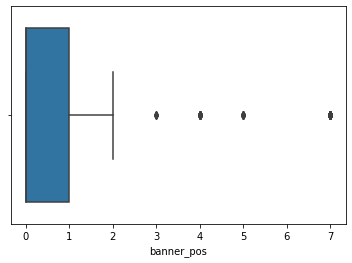

In [13]:
sns.boxplot(df['banner_pos'])

#### The banner_pos comes as an option among 7 integers, and it is not obvious of what it represents. We should not assume that ordering has any meaning (it may very well be that each integer corresponds to a broad 2D position in a webpage). Lets see how it relates to clicks:

In [14]:
train_banner_pos_group_df = df.groupby(['banner_pos', 'click']).size().unstack()

<AxesSubplot:title={'center':'Banner position'}, xlabel='banner_pos'>

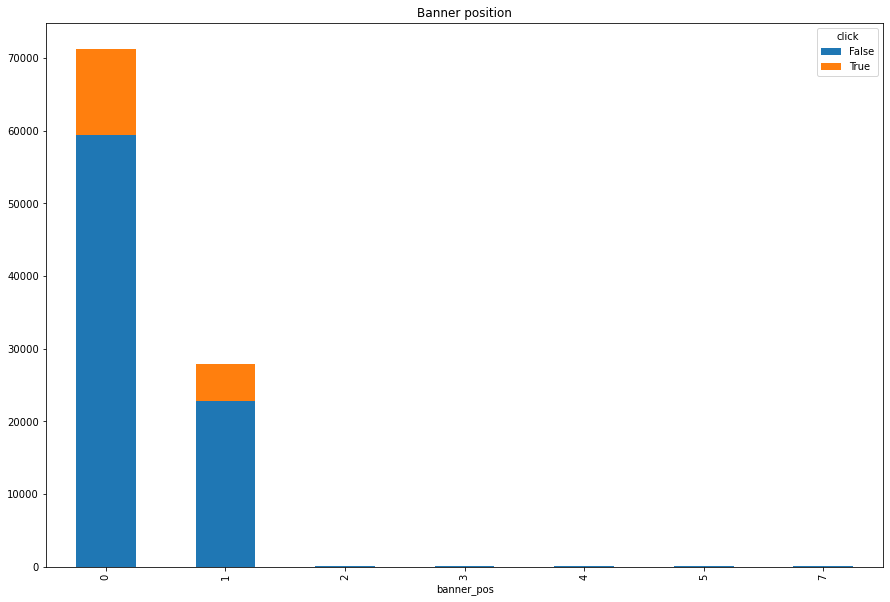

In [15]:
f, ax = plt.subplots(figsize=(15,10))
train_banner_pos_group_df.plot(kind='bar', stacked=True, title='Banner position', ax=ax)

Positions 0 and 1 seem to be the most used ones. We have to make another plot to gain insight over the other variables:

<AxesSubplot:title={'center':'Banner position'}, xlabel='banner_pos'>

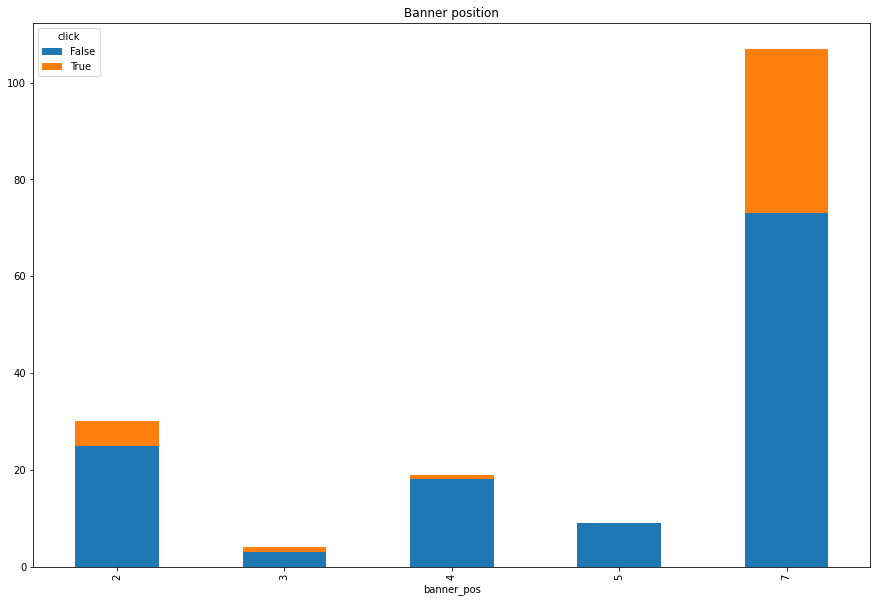

In [16]:
f, ax = plt.subplots(figsize=(15,10))
train_banner_pos_group_df.iloc[2:].plot(kind='bar', stacked=True, title='Banner position', ax=ax)

Position 7 seems to be very good for positioning ads. These are the CTRs, normalized by banner position:

In [17]:
train_banner_pos_group_df / df.shape[0]

click,False,True
banner_pos,,
0,0.598182,0.119387
1,0.229694,0.051036
2,0.000252,0.000050
3,0.000030,0.000010
4,0.000181,0.000010
5,0.000091,NaN
7,0.000735,0.000342


In [18]:
# Now Normalize by banner position
train_banner_pos_group_df.div(train_banner_pos_group_df.sum(axis=1), axis=0)

click,False,True
banner_pos,,
0,0.833623,0.166377
1,0.818201,0.181799
2,0.833333,0.166667
3,0.750000,0.250000
4,0.947368,0.052632
5,1.000000,NaN
7,0.682243,0.317757


### Site-related features
Regarding the site, we have the features id, domain and category:

In [19]:
df['site_id'].value_counts(normalize = True)

85f751fd    0.358664
1fbe01fe    0.159491
e151e245    0.066317
d9750ee7    0.023908
5b08c53b    0.023193
              ...   
8274ff04    0.000010
aa0b6551    0.000010
e8b73128    0.000010
ac7846cb    0.000010
d24f3bd9    0.000010
Name: site_id, Length: 1485, dtype: float64

In [20]:
df['site_domain'].value_counts(normalize = True)

c4e18dd6    0.372152
f3845767    0.159491
7e091613    0.082071
7687a86e    0.032404
98572c79    0.024713
              ...   
66cf2855    0.000010
9c7ca2e8    0.000010
fa8e5d85    0.000010
683754f6    0.000010
95be4dfd    0.000010
Name: site_domain, Length: 1331, dtype: float64

In [21]:
df['site_category'].value_counts(normalize = True)

50e219e0    0.407103
f028772b    0.314080
28905ebd    0.182020
3e814130    0.076977
f66779e6    0.006372
75fa27f6    0.003946
335d28a8    0.003574
76b2941d    0.002466
c0dd3be3    0.001037
72722551    0.000644
dedf689d    0.000584
70fb0e29    0.000443
0569f928    0.000342
8fd0aea4    0.000191
a818d37a    0.000121
42a36e14    0.000040
e787de0e    0.000040
5378d028    0.000010
9ccfa2ea    0.000010
Name: site_category, dtype: float64

In [22]:
site_features = ['site_id','site_domain','site_category']

In [23]:
df[site_features].describe()

,site_id,site_domain,site_category
count,99341,99341,99341
unique,1485,1331,19
top,85f751fd,c4e18dd6,50e219e0
freq,35630,36970,40442


<AxesSubplot:title={'center':'Site Category Histogram'}>

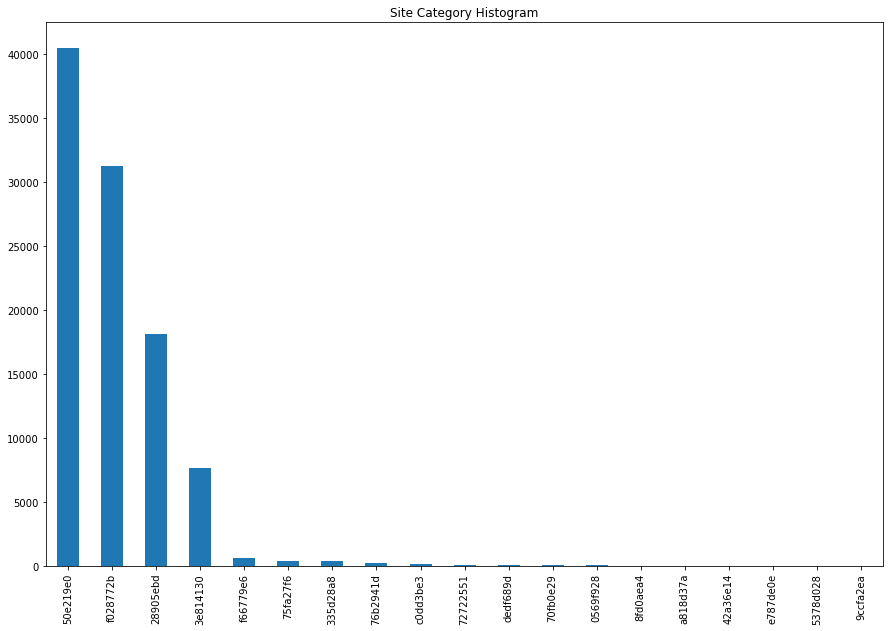

In [24]:
f, ax = plt.subplots(figsize=(15,10))
df['site_category'].value_counts().plot(kind='bar', title='Site Category Histogram', ax=ax)

### App-related features
Regarding the app, we have the features id, domain and category:

In [25]:
app_features = ['app_id', 'app_domain', 'app_category']

In [26]:
df[app_features].describe()

,app_id,app_domain,app_category
count,99341,99341,99341
unique,1354,96,21
top,ecad2386,7801e8d9,07d7df22
freq,63711,67194,64502


<AxesSubplot:title={'center':'App Category Plot'}>

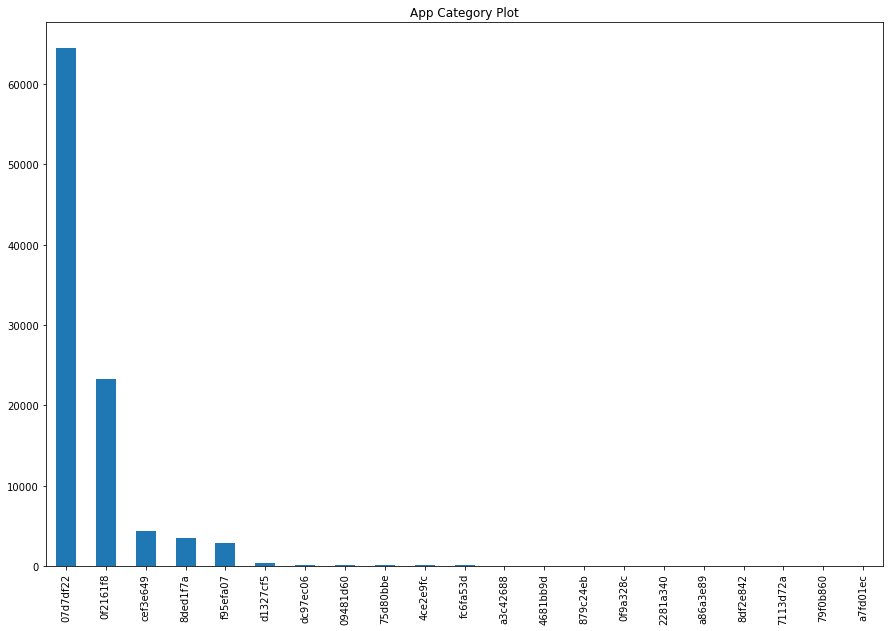

In [27]:
f, ax = plt.subplots(figsize=(15,10))
df['app_category'].value_counts().plot(kind='bar', title='App Category Plot' , ax=ax)

In [28]:
train_app_category_group_df = df.groupby(['app_category', 'click']).size().unstack()

<AxesSubplot:title={'center':'Intra-category CTR'}, xlabel='app_category'>

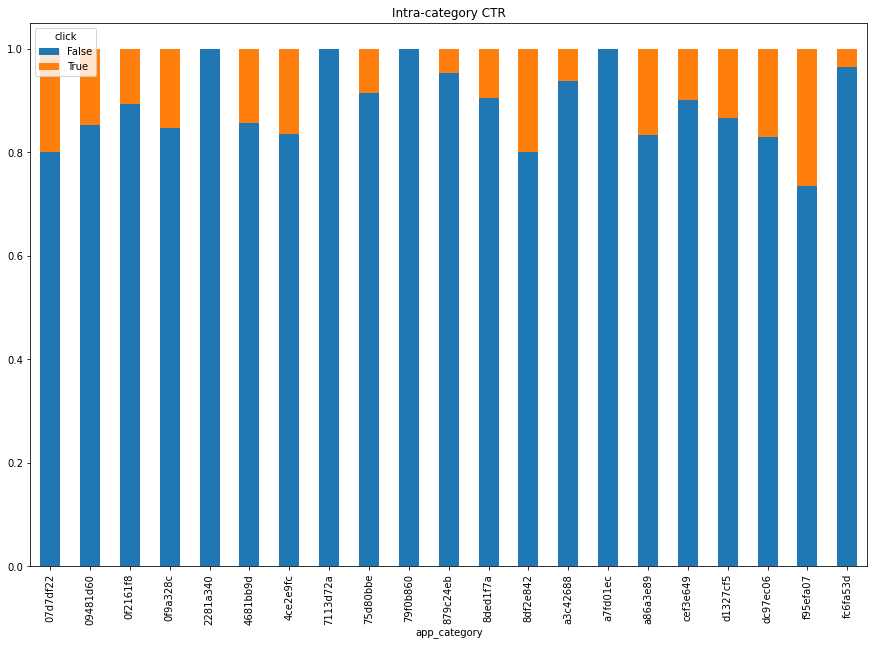

In [29]:
f, ax = plt.subplots(figsize=(15,10))
train_app_category_group_df.div(train_app_category_group_df.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title="Intra-category CTR" , ax=ax)

### Device-related features
Regarding the device, we have the features id, ip, model, type and connection type:

In [30]:
device_features = ['device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type']

In [31]:
df[device_features].astype('object').describe()

,device_id,device_ip,device_model,device_type,device_conn_type
count,99341,99341,99341,99341,99341
unique,16801,78013,3145,4,4
top,a99f214a,6b9769f2,8a4875bd,1,0
freq,81940,518,6032,91589,85872


<AxesSubplot:title={'center':'Device type Graph'}, xlabel='device_type'>

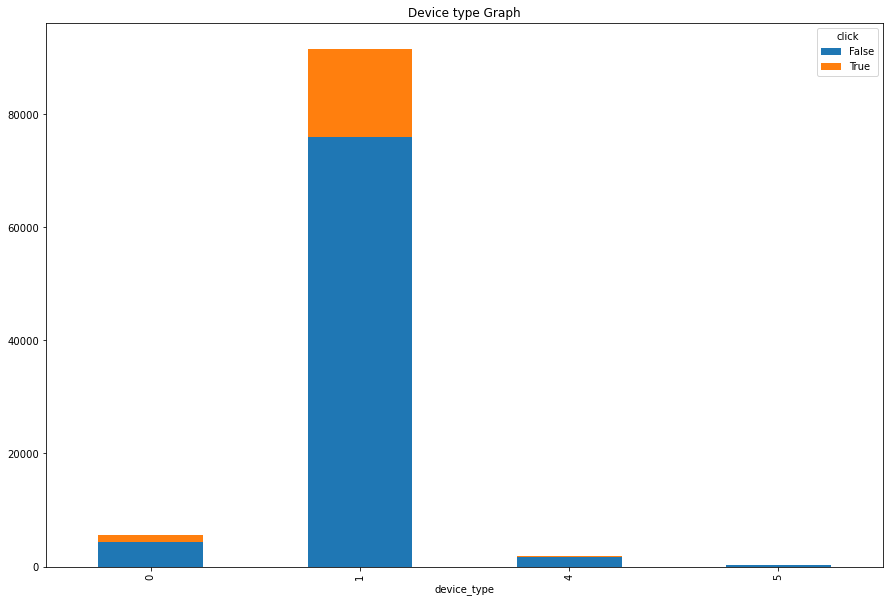

In [32]:
f, ax = plt.subplots(figsize=(15,10))
df.groupby(['device_type', 'click']).size().unstack().plot(kind='bar', stacked=True, title='Device type Graph', ax=ax)

<AxesSubplot:title={'center':'Device connection type Graph'}, xlabel='device_conn_type'>

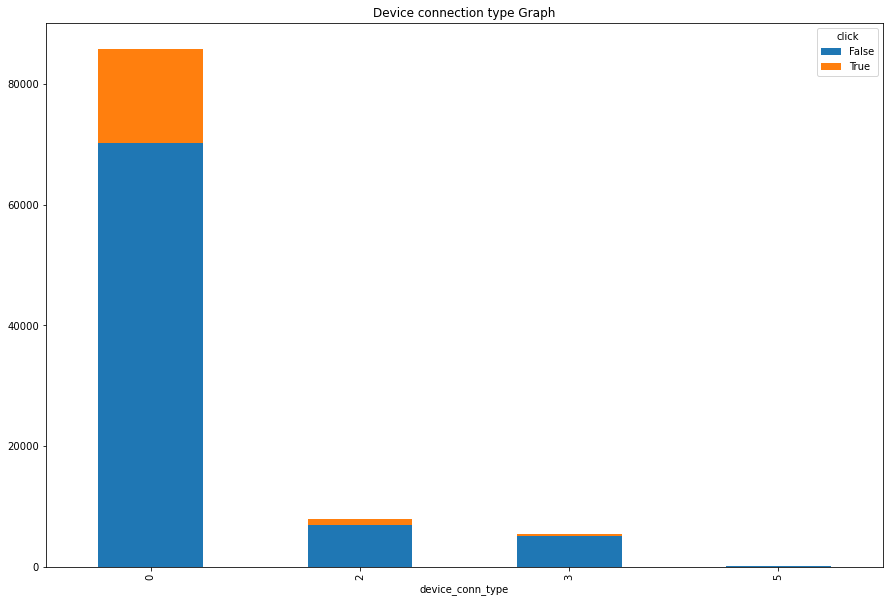

In [33]:
f, ax = plt.subplots(figsize=(15,10))
df.groupby(['device_conn_type', 'click']).size().unstack().plot(kind='bar', stacked=True, title='Device connection type Graph', ax=ax)

### Anonymous Feature

In [34]:
annonym_features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [35]:
print("There are {} C1 in the data set".format(df.C1.nunique()))
print("There are {} C14 in the data set".format(df.C14.nunique()))
print("There are {} C15 in the data set".format(df.C15.nunique()))
print("There are {} C16 in the data set".format(df.C16.nunique()))
print("There are {} C17 in the data set".format(df.C17.nunique()))
print("There are {} C18 in the data set".format(df.C18.nunique()))
print("There are {} C19 in the data set".format(df.C19.nunique()))
print("There are {} C20 in the data set".format(df.C20.nunique()))

There are 7 C1 in the data set
There are 1722 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 399 C17 in the data set
There are 4 C18 in the data set
There are 64 C19 in the data set
There are 154 C20 in the data set


In [36]:
df[annonym_features].astype('object').describe()

,C1,C14,C15,C16,C17,C18,C19,C20,C21
count,99341,99341,99341,99341,99341,99341,99341,99341,99341
unique,7,1722,8,9,399,4,64,154,60
top,1005,4687,320,50,1722,0,35,-1,23
freq,91213,2302,92484,93556,10984,41459,29745,46457,22058


<AxesSubplot:title={'center':'C1 BarGraph'}, xlabel='C1'>

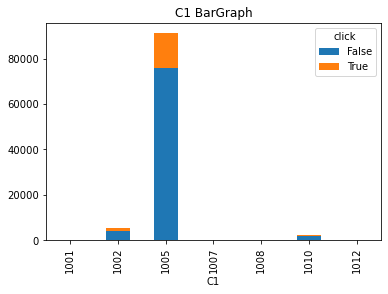

In [37]:
df.groupby(['C1', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C1 BarGraph')

<AxesSubplot:title={'center':'C15 BarGraph'}, xlabel='C15'>

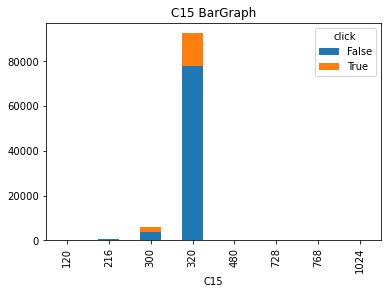

In [38]:
df.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C15 BarGraph')

<AxesSubplot:title={'center':'C16 BarGraph'}, xlabel='C16'>

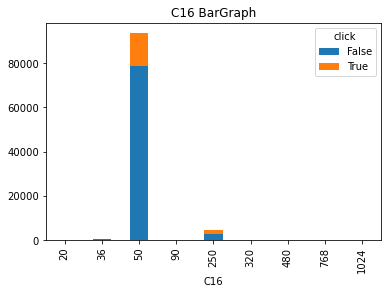

In [39]:
df.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C16 BarGraph')

<AxesSubplot:title={'center':'C18 BarGraph'}, xlabel='C18'>

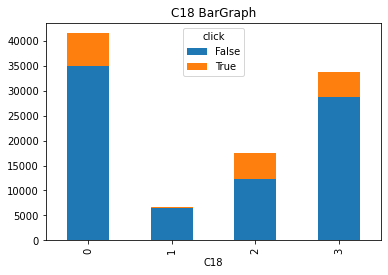

In [40]:
df.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=True, title='C18 BarGraph')

### Analyzing Through CTR Hour , Month , Day of The Week

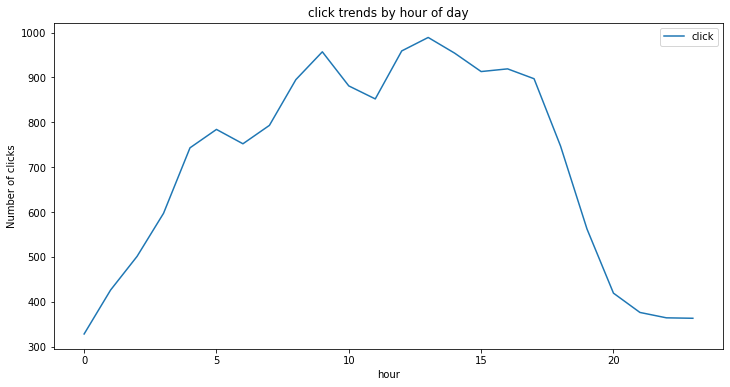

In [41]:
df.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

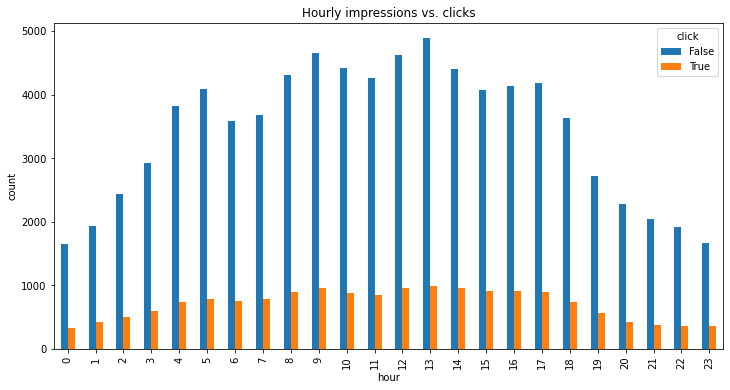

In [42]:
df.groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

Text(0.5, 1.0, 'click trends by day of week')

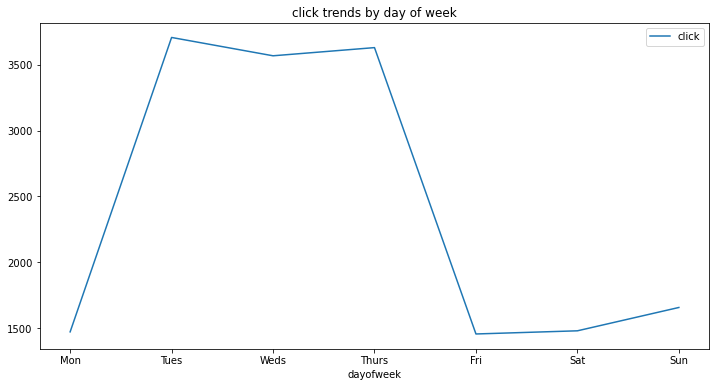

In [43]:
df.groupby('dayofweek').agg({'click':'sum'}).plot(figsize=(12,6))
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week')

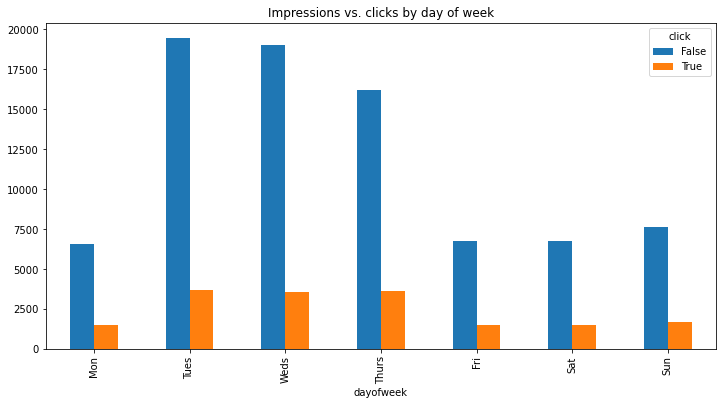

In [44]:
df.groupby(['dayofweek','click']).size().unstack().plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week');

In [45]:
df.month.unique().shape[0]

1

In [46]:
df=df.drop(['month'],axis=1)

### FINDING THE CORRELATION BETWEEN THE VARIABLES

In [47]:
df_corr=df.corr()

<AxesSubplot:>

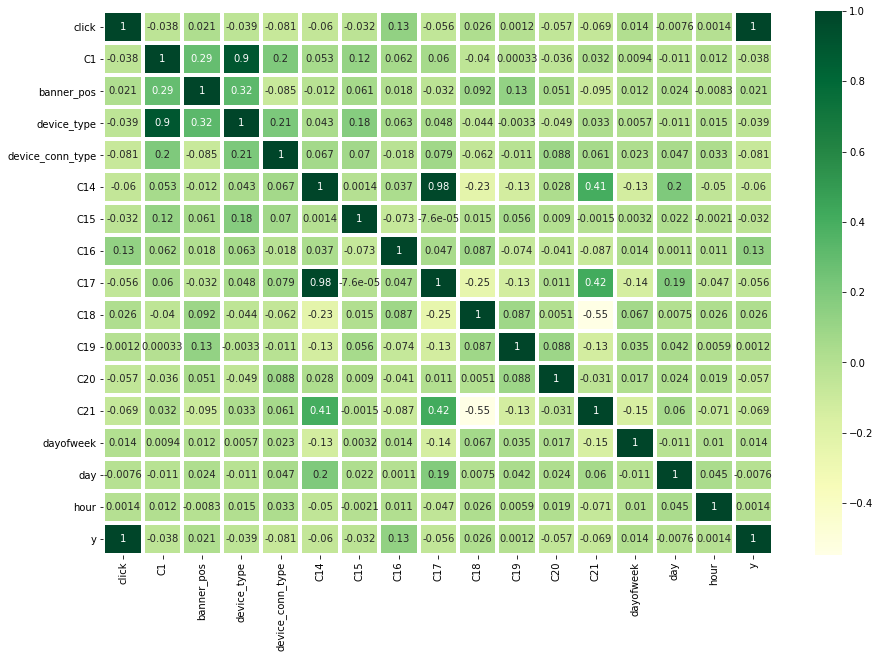

In [48]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,ax=ax, annot=True,linewidths=3,cmap='YlGn')

## 7.) Use model simplification techniques like feature creation and selection, to improve model predictability. 
For simplifying the model we can refer to correlation matrix to remove highly correlated features
### As we can see y and Click have correaltion as 1 so this coloumn should be removed

In [49]:
df=df.drop(['click'],axis=1)

**Use suitable techniques to treat the categorical columns**.

**Perform Label encoding for the categorical data**

In [50]:
from sklearn.preprocessing import LabelEncoder 
labelEncoder= LabelEncoder()
df['site_id'] = labelEncoder.fit_transform(df['site_id'])
df['site_domain'] = labelEncoder.fit_transform(df['site_domain'])
df['site_category'] = labelEncoder.fit_transform(df['site_category'])
df['app_id'] = labelEncoder.fit_transform(df['app_id'])
df['app_domain'] = labelEncoder.fit_transform(df['app_domain'])
df['app_category'] = labelEncoder.fit_transform(df['app_category'])
df['device_id'] = labelEncoder.fit_transform(df['device_id'])
df['device_ip'] = labelEncoder.fit_transform(df['device_ip'])
df['device_model'] = labelEncoder.fit_transform(df['device_model'])

**Perform One hot encoding for Banner Position**

In [51]:
df = pd.get_dummies(df, columns = ['banner_pos'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99341 entries, 0 to 99998
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   C1                99341 non-null  int64
 1   site_id           99341 non-null  int32
 2   site_domain       99341 non-null  int32
 3   site_category     99341 non-null  int32
 4   app_id            99341 non-null  int32
 5   app_domain        99341 non-null  int32
 6   app_category      99341 non-null  int32
 7   device_id         99341 non-null  int32
 8   device_ip         99341 non-null  int32
 9   device_model      99341 non-null  int32
 10  device_type       99341 non-null  int64
 11  device_conn_type  99341 non-null  int64
 12  C14               99341 non-null  int64
 13  C15               99341 non-null  int64
 14  C16               99341 non-null  int64
 15  C17               99341 non-null  int64
 16  C18               99341 non-null  int64
 17  C19               99341 non-nul

In [53]:
df.head()

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,...,day,hour,y,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7
0,1005,784,461,17,1254,38,0,11220,45791,2288,...,28,14,0,0,1,0,0,0,0,0
1,1005,1287,673,17,1254,38,0,11220,27757,342,...,22,19,1,0,1,0,0,0,0,0
2,1005,1293,1112,1,1254,38,0,11220,51733,1862,...,23,18,0,1,0,0,0,0,0,0
3,1002,80,182,5,1254,38,0,988,41758,2863,...,22,19,0,1,0,0,0,0,0,0
4,1005,179,1272,1,1254,38,0,11220,9312,682,...,21,8,1,1,0,0,0,0,0,0


In [54]:
x=df.drop(['y'],axis=1) #contain all  independent variable
y=df['y']           #dependent variable

**Use model simplification techniques like feature creation and selection, to improve model predictability**
**Class Feature Importance**

[2.89620756e-03 3.37977863e-02 2.91154127e-02 1.14940704e-02
 1.53186805e-02 8.08861693e-03 8.21473706e-03 2.67145349e-02
 2.06476275e-01 1.70049187e-01 2.79381327e-03 1.12876328e-02
 9.08629930e-02 5.71548393e-03 1.07791868e-02 2.48258888e-02
 1.48161965e-02 1.95042680e-02 4.29677870e-02 1.63134531e-02
 4.28450876e-02 4.49729532e-02 1.54527232e-01 2.78039098e-03
 2.55959855e-03 4.89609913e-05 2.87602220e-05 2.20428992e-05
 3.50642098e-06 1.79256721e-04]


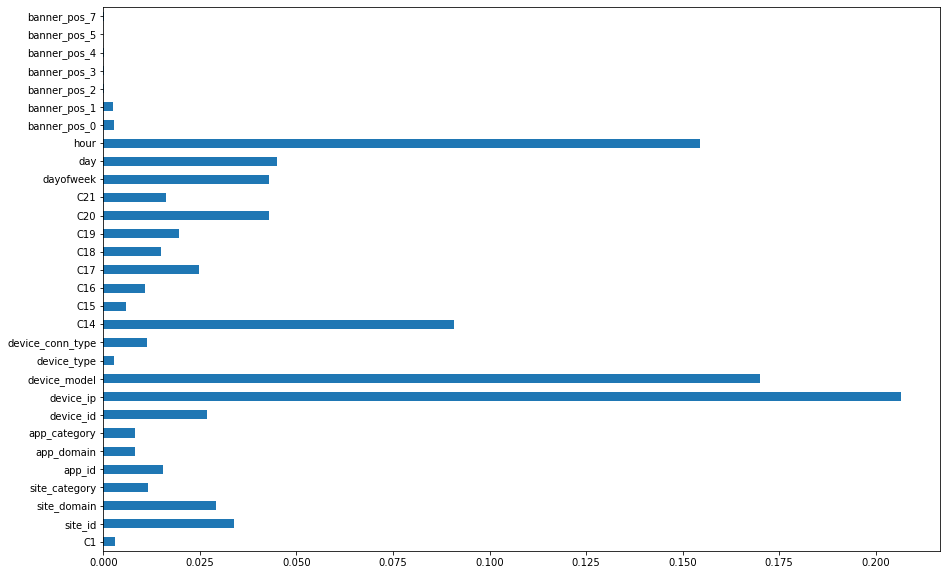

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
f, ax = plt.subplots(figsize=(15,10))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')
plt.show()

## 7.) Use model simplification techniques like feature creation and selection, to improve model predictability. 

VIF technique is used to detect multi - colinearity between the variables and will be used for finding the feature importance and performing feature selection

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

             feature           VIF
0                 C1  5.826120e+00
1            site_id  1.457359e+00
2        site_domain  1.838402e+00
3      site_category  2.297276e+00
4             app_id  1.702133e+00
5         app_domain  1.088549e+00
6       app_category  1.492249e+00
7          device_id  1.078286e+00
8          device_ip  1.000495e+00
9       device_model  1.014321e+00
10       device_type  6.190471e+00
11  device_conn_type  1.241900e+00
12               C14  2.291976e+01
13               C15  1.064717e+00
14               C16  1.304796e+00
15               C17  2.315473e+01
16               C18  1.619073e+00
17               C19  1.076227e+00
18               C20  1.083245e+00
19               C21  1.718602e+00
20         dayofweek  1.037367e+00
21               day  1.067001e+00
22              hour  1.015106e+00
23      banner_pos_0  3.508943e+06
24      banner_pos_1  1.372797e+06
25      banner_pos_2  1.477530e+03
26      banner_pos_3  2.006688e+02
27      banner_pos_4

**APPROACH** 

First we will run the model with Vanilla set up and then to improve upon the performance we will use the above findings to fine tune
our model. 

1. VIF will be used deal with problem of multi-colinearity ,
2. Correlation will also be used to check highly colinear variables, and 
3. Feature importance , which uses GINI to identify most important feature will be used.

### Handling Imbalanced data
### As  we observed observation of one class is higher than the observation in other classesso there is  a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

Original dataset shape Counter({0: 82370, 1: 16971})
Resampled dataset shape Counter({0: 82370, 1: 82370})


<AxesSubplot:xlabel='y', ylabel='count'>

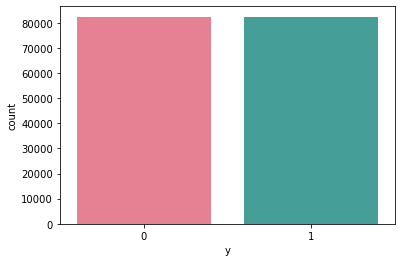

In [57]:
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

## 3.) Perform a train-test split in the data set

In [58]:
#dividing the dataset into training and testing

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(115318, 30) (49422, 30) (115318,) (49422,)


## 4.) Identify the 3 classification methods you will use in the data set, and explain the reason you chose those 3 methods in the notebook file you will share in the submission process.

Problem can be identified as Binary Classification

Idea is to start selection of models as:

1.Logistic Regression - This is classification problem and there are categorical variables in the data , this model can used effectively.

2.Decision Tree - based on the available categories the outcome of the data can be predicted properly  , and as seen above through feature importance , we can assess that there are certain variables that can completely describe the data.

3.Random Forest - To see appropriate predictability we have picked RF as well.

## 5.) For all 3 methods, use appropriate evaluation metrics to assess model performance. 

*First we will be Running the Vanilla Model , and then check the performance metrics for Logistic Regression. After this we will fine tune model using features selection.*

**LOGISTIC REGRESSION**

In [59]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]
acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.5915381813767149
ROC_AUC Score: 0.5915169783275971


Evaluation metrics for logistic regression

In [60]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59     24536
           1       0.59      0.59      0.59     24886

    accuracy                           0.59     49422
   macro avg       0.59      0.59      0.59     49422
weighted avg       0.59      0.59      0.59     49422



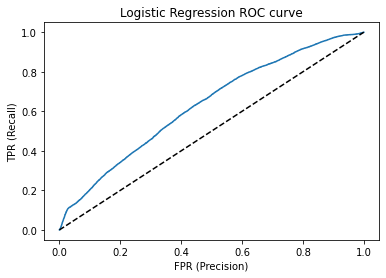

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[14440 10091]
 [10096 14795]]


<AxesSubplot:>

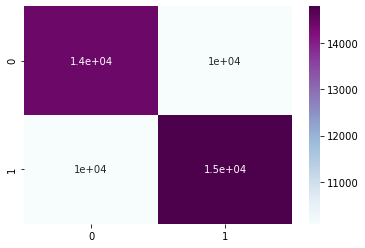

In [62]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

MODEL FINE TUNING USING THE FEATURE SELECTION AND USING PARAMETER TUNING**

In [63]:
# Based on Correlation C14 and C17 are highly correlated as we checked above so we will drop any of these in tuned model
# We will use RandomizedSearchCV for cross-validation and checking wether l1 or l2 penalty is better
# Based on VIF we will try to drop C1, device_type , banner_pos_4,banner_pos_7

x_tune_new=df.drop(columns = ['C14','C1','banner_pos_4','banner_pos_7'],axis=1) #contain all  independent variable
y_tune_new=df['y'] 

from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
x_tune_new,y_tune_new=randomsample.fit_resample(x_tune_new,y_tune_new)


#dividing the dataset into training and testing
from sklearn.model_selection import train_test_split
x_tuned_train,x_tuned_test,y_tuned_train,y_tuned_test=train_test_split(x_tune_new,y_tune_new,test_size=.30,random_state=0)
print(x_tuned_train.shape,x_tuned_test.shape,y_tuned_train.shape,y_tuned_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_tuned_train=scaler.fit_transform(x_tuned_train)
x_tuned_test=scaler.transform(x_tuned_test)

(115318, 27) (49422, 27) (115318,) (49422,)


Model Regularization by applying penalty

In [64]:
from sklearn.model_selection import RandomizedSearchCV

max_iter = [50, 75, 100,125,150]
# Create regularization hyperparameter distribution using uniform distribution
C = np.linspace(0,1,5)
# Create hyperparameter options
hyperparameters = dict(C=C, max_iter=max_iter)
clf_logit = RandomizedSearchCV(LogisticRegression(), hyperparameters, random_state=42, cv=3, verbose=0)
best_model = clf_logit.fit(x_tuned_train,y_tuned_train)
print('Best Penalty:', best_model.best_estimator_.get_params())

Best Penalty: {'C': 0.25, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 125, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [65]:
clf_0 = LogisticRegression(max_iter=125, C=0.25,penalty = 'l2').fit(x_tuned_train,y_tuned_train)

pred_tuned_ytest=clf_0.predict(x_tuned_test)
lr_tuned_probability =clf_0.predict_proba(x_tuned_test)[:,1]

In [66]:
print(classification_report(pred_tuned_ytest,y_tuned_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24531
           1       1.00      1.00      1.00     24891

    accuracy                           1.00     49422
   macro avg       1.00      1.00      1.00     49422
weighted avg       1.00      1.00      1.00     49422



[[24531     0]
 [    0 24891]]


<AxesSubplot:>

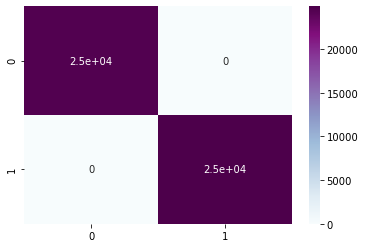

In [67]:
cm_tuned=confusion_matrix(y_tuned_test,pred_tuned_ytest)
print(cm_tuned)
sns.heatmap(cm_tuned,annot=True,cmap='BuPu')

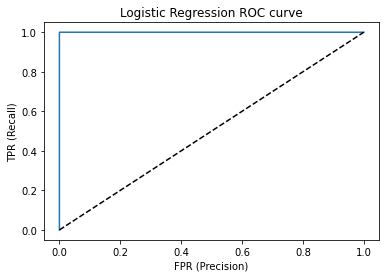

In [68]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_tuned_test, lr_tuned_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Decision Tree**

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt_clf = DecisionTreeClassifier()

In [71]:
dt_clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [72]:
#Predicting the test set result  
y_pred= dt_clf.predict(xtest)
acc_dt=accuracy_score(ytest,y_pred)
recall_dt=recall_score(ytest,y_pred)
precision_dt=precision_score(ytest,y_pred)
f1score_dt=f1_score(ytest,y_pred)
AUC_dt=roc_auc_score(y_pred,ytest)

Decison Tree evaluation metrics to assess model performance.

[[19593  4938]
 [  554 24337]]


<AxesSubplot:>

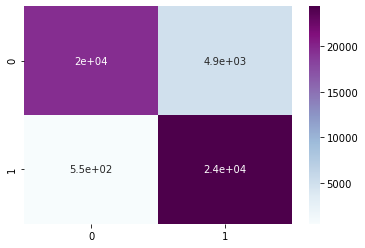

In [73]:
cm= confusion_matrix(ytest, y_pred) 
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [74]:
print("Accuracy score for decision tree : ", accuracy_score(ytest,y_pred))
print("Recall score for decision tree : ", recall_score(ytest,y_pred))
print("Precision score for decision tree : ", precision_score(ytest,y_pred))

Accuracy score for decision tree :  0.8888753996196026
Recall score for decision tree :  0.9777429593025592
Precision score for decision tree :  0.8313236549957301


In [75]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     20147
           1       0.98      0.83      0.90     29275

    accuracy                           0.89     49422
   macro avg       0.89      0.90      0.89     49422
weighted avg       0.90      0.89      0.89     49422



Using Tuned model now for decision tree along with best parameters for Decision tree

In [76]:
from sklearn.model_selection import GridSearchCV
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(dec_tree__criterion=criterion,dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(dt_clf,parameters)

In [77]:
# sets of hyperparameters
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}
# Separate models
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)
model_1.fit(xtrain, ytrain)
model_2.fit(xtrain, ytrain)
model_3.fit(xtrain, ytrain)
model_4.fit(xtrain, ytrain)
model_5.fit(xtrain, ytrain)
# Prediction sets
preds_1 = model_1.predict(xtest)
preds_2 = model_3.predict(xtest)
preds_3 = model_3.predict(xtest)
preds_4 = model_4.predict(xtest)
preds_5 = model_5.predict(xtest)
print(f'Accuracy on Model 1: {round(accuracy_score(ytest, preds_1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(ytest, preds_2), 3)}')
print(f'Accuracy on Model 3: {round(accuracy_score(ytest, preds_3), 3)}')
print(f'Accuracy on Model 4: {round(accuracy_score(ytest, preds_4), 3)}')
print(f'Accuracy on Model 5: {round(accuracy_score(ytest, preds_5), 3)}')

Accuracy on Model 1: 0.889
Accuracy on Model 2: 0.89
Accuracy on Model 3: 0.89
Accuracy on Model 4: 0.891
Accuracy on Model 5: 0.886


**Random Forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred_rf = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred_rf,ytest)
acc_rf=accuracy_score(ytest,y_pred_rf)
recall_rf=recall_score(ytest,y_pred_rf)
precision_rf=precision_score(ytest,y_pred_rf)
f1score_rf=f1_score(ytest,y_pred_rf)

print(accuracy_score(y_pred_rf,ytest))
print("ROC_AUC Score:",AUC_RF)

0.9283315122819796
ROC_AUC Score: 0.9327675932805247


In [79]:
print(classification_report(y_pred_rf,ytest))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     22103
           1       0.98      0.89      0.93     27319

    accuracy                           0.93     49422
   macro avg       0.93      0.93      0.93     49422
weighted avg       0.93      0.93      0.93     49422



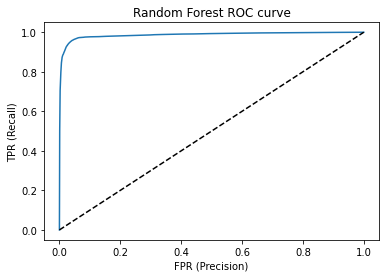

In [80]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Random Forest -  evaluation metrics to assess model performance.

[[21546   557]
 [ 2985 24334]]


<AxesSubplot:>

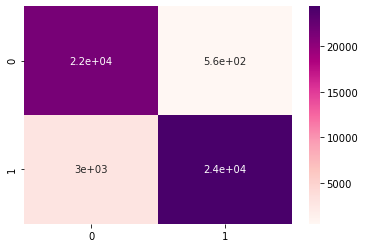

In [81]:
cm_rf=confusion_matrix(y_pred_rf,ytest)
print(cm_rf)
sns.heatmap(cm_rf,annot=True,cmap='RdPu')

**XGBoost**

In [82]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_xgb_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_xgb_predict)
recall_xgb=recall_score(ytest,y_xgb_predict)
precision_xgb=precision_score(ytest,y_xgb_predict)
f1score_xgb=f1_score(ytest,y_xgb_predict)

AUC_xgb=roc_auc_score(y_xgb_predict,ytest)


print(accuracy_score(y_xgb_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.7175549350491683
ROC_AUC Score: 0.719703357205628


In [83]:
print(classification_report(y_xgb_predict,ytest))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70     22054
           1       0.77      0.70      0.73     27368

    accuracy                           0.72     49422
   macro avg       0.72      0.72      0.72     49422
weighted avg       0.72      0.72      0.72     49422



## 6.) Compare which methods work best based on the evaluation metrics mentioned in the previous point.

In [84]:
ind=['Logistic regression','Randomforest','Decision Tree']
data={"Accuracy":[acc_lr,acc_rf,acc_dt],"Recall":[recall_lr,recall_rf,recall_dt],"Precision":[precision_lr,precision_rf,precision_dt],
    'f1_score':[f1score_lr,f1score_rf,f1score_dt],"ROC_AUC":[AUC_LR,AUC_RF,AUC_dt]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.591538,0.594392,0.594511,0.594451,0.591517
Randomforest,0.928332,0.977622,0.890735,0.932159,0.932768
Decision Tree,0.888875,0.977743,0.831324,0.898608,0.901913
